In [1]:
from __future__ import division
from scipy import linalg as la
from scipy import optimize
import sympy
import numpy as np
import matplotlib.pyplot as plt
sympy.init_printing()

In [5]:
"""
Non linear equations cannot be written as a matrix-vector multiplication
instead, a system of multivariate nonlinear equations are written as a vector valued functions

for example: f:Rn -> Rn that takes n dimensionlal vector and maps it to another 
n-dimensional vector

Newton's method can be used for multivariate problems, and in this case, its 
iteration formular id

xk+1 = xk - Jf(xk)`(f(xk)) where Jf(xk) is the Jacobian matrix of the function f(x)
with elements [Jf(xk)ij] = dfi(xk)/dxi

instead of inverting the jacobian matrix, it is sufficient to solve the 
linear equation system Jf(xk)dxk = -f(xk) and update xk using xk + dxk like the secant variables of the newton method
that avoid computing the jacobian by estimating it from previous function evaluations.

Broyden's method is a particular exapmle of this method for multivariate equation systems.
in the scipy optimize module, broyden 1 and broyden 2 provide two implementations
of Broyden's method using different approximations of the jacobian and the 
function optimize.fsolve that provides an implementation of Newton-like method
where optionally th jacobian can be specified if available

the functions all have similar function signatures
arguments:
-python function representing the equation to be solved, and it should take an array
and it should take a numpy array as the first argument and it should return an array of the same shape
-the secon argument is an inittial guess for the solution as a numpy array
-optimize.fsole function also takes fprime as an optional keyword argument
which can be used to provide a function that eturns the Jacobian of the function of fx
-In addititon, there are other arguments for fine tuning, see the docstrings

"""

# for example, consider the following system of 2 multivariate and nonlinear equations

# y - x**3 -2x**2 + 1 = 0
# y + x**2 -1 = 0

# this can be represented by the vector valued function

# f([x1, x2]) = [x2 - x**3 - 2x**2 + 1, x2 + x**2 - 1]

# to solve this using scipy we need to define python function for f([x1, x2])
# and call, for example the optimize.fsolve using the function and an inititial guess for the vector

def f(x):
    return [x[1] - x[0]**3 -2*x[0]**2 + 1, x[1] + x[0]**2 - 1]

optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [3]:
# the eoptimize.broyden1 and optimize.broyden2 can be used in a similar manner
# to specify a jacobian for optimize.fsolve to use, we need to define a funcition
# that evaluates the jacobian for a given input vector

x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 -1])
f_mat.jacobian(sympy.Matrix([x, y]))

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [6]:
# this we can implement as a python function that can be passed to the optimize.fsolve function

def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

optimize.fsolve(f, [1,1], fprime=f_jacobian)

array([0.73205081, 0.46410162])

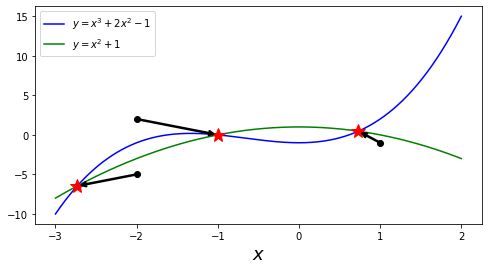

In [5]:
def f(x):
    return [x[1] - x[0]**3 -2*x[0]**2 +1, x[1] + x[0]**2 -1]

x = np.linspace(-3, 2, 5000)
y1 = x**3 + 2*x**2 -1
y2 = -x**2 + 1

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x, y1, 'b', lw=1.5, label='$y = x^3 + 2x^2 - 1$')
ax.plot(x, y2, 'g', lw=1.5, label='$y = x^2 + 1$')

x_guesses = [[-2,2], [1,-1], [-2,-5]]

for x_guess in x_guesses:
    sol = optimize.fsolve(f, x_guess)
    ax.plot(sol[0], sol[1], 'r*', markersize=15)
    
    ax.plot(x_guess[0], x_guess[1], 'ko')
    ax.annotate("", xy=(sol[0], sol[1]), xytext=(x_guess[0], x_guess[1]), arrowprops=dict(arrowstyle="->", linewidth=2.5))
    ax.legend(loc=0)
    ax.set_xlabel(r'$x$', fontsize=18)